In [0]:
!pip install -U -q PyDrive
import os
from os import chdir, listdir, stat
from sys import exit
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ast
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from pydrive.files import GoogleDriveFileList
import googleapiclient.errors
import cv2
import numpy as np

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


def download_files(path,class_type):
    local_download_path = os.path.expanduser('~/data/'+ class_type)
    try:
      os.makedirs(local_download_path)
    except: pass
    ph=[]
    file_list = drive.ListFile(
        {'q': "'"+path+"' in parents"}).GetList()

    for index,f in enumerate(file_list):
           
        # 3. Create & download by id.
            print(index)
            print('title: %s, id: %s' % (f['title'], f['id']))
            file_list2 = drive.ListFile(
            {'q': "'"+str(f['id'])+"' in parents"}).GetList()
            fname = os.path.join(local_download_path, f['title'])
            f_ = drive.CreateFile({'id': f['id']})
            f_.GetContentFile(fname)
            img =mpimg.imread(fname)
            #gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert image to Greyscale
            #small_img = img.astype("float32")/255 # Scale image pixels to 0-1 range
            ph.append(img)             
    return np.array(ph)

In [5]:
anime = download_files("1WcPUviRkO9xv5q3mJ20NFN7GafJmcG0D",'Anime') #for first time fetching for files

0
title: Imgur - Miyako_CSN82mN resized.jpg, id: 1afLf53iBrDgXTAB2KdjLEZTnGdxUZ3-E
1
title: Hinata.(Pokémon).full.861803 resized.jpg, id: 19H8256CcGHB-lRU64VUZUPOE-V9jb380
2
title: Imgur - Miyako Inoue_LvXdQH6 resized.jpg, id: 1Yf3ngEK1wcXXhnZvzdlV_5CUz75FUHGm
3
title: Imgur - Revenge of Diaboromon_X6QW4st resized.jpg, id: 1C0SG78Xp_0ZVkFj3bHnJ4OjPY6EECQRH
4
title: Imgur - Miyako Inoue_RwIIVeT resized.jpg, id: 1pGbEkUJnKCqqil6OU691jUQ3VWi3XkI5
5
title: Imgur - sleeping in the car_WbJL1xu resized.jpg, id: 1JRu9Kua7wMy1lVsAZhcfllef4Ra58fSV
6
title: inspector-aoyanagi-death resized.jpg, id: 1jc8ImXFelNfKo8n91Dq2G0wjJvTEHbNX
7
title: Imgur - Miyako Inoue_UNZNDeq resized.jpg, id: 1vFjMvEcVUpc9HpLb9uAaJi79JY3btSnK
8
title: Imgur - Yolei_HiZdr7v resized.jpg, id: 18n-oA73VaKQ4uRsqBYycazucG-gKBaVL
9
title: Imgur - Miyako Inoue_dC11vnX resized.jpg, id: 1qbx9xfTYELxc9znC_fvYRJfrW3960YUu
10
title: Hikari.(Pokémon).full.773935 resized.jpg, id: 1kq6Sr5VxcRLOuulk05kAE6GPlU5qkveo
11
title: Imgur - Miy

In [6]:
cartoon = download_files("142Btd5hJZJiW76TcZ-6rJFtpCzbHpk7i",'Cartoon') #for first time fetching for files

0
title: 0f50a7b723acdf1bd10cb341931d8a9f resized.jpg, id: 174fAX6OWpezRgcgspOXU-UzkbvONO4ZT
1
title: 0eaf1c7f0d7f2bd5ffa27cfa7ef1e8b9--scuba-gear-scooby-doo resized.jpg, id: 1wTvXtCNyvmyBDq-aAG3xWs9_UhQ5cRv6
2
title: 0e6c9cba12d74f88cf0c1c8081559b97 resized.jpg, id: 1LNNqUu7aT_GRfbJd_MnixJwluGGQS2Gb
3
title: 0 resized.jpg, id: 1Z8Ws3fjCdjD1EoG67iLHk64pJ9tLV7gs
4
title: 000 resized.jpg, id: 1sdkJC07eVvXUruet4YiZaWhPBQukkqsF
5
title: 1c3afc44fa3a51a347e49d502b403ecc--ben--omniverse-kevin-oleary resized.jpg, id: 1UHthbHodkXd505eu2igS_BUAwOkv8lCb
6
title: 1NWl-GBjLXg-ZeTWbvGoa6A resized.jpg, id: 1TTGZ25VIJ3O78CRHRu_2wTwuAEa825d9
7
title: 1b9f2d4d124c84d47cf2368dca6233f3 resized.jpg, id: 1qKxRKjKSAry3T31PaSLmTyGVebx8_2xt
8
title: 001-111 resized.jpg, id: 1k35f-nk_Jj0ZM6blpqCFKAPT9YxMILZb
9
title: 2a6a44fbde1ecd301806777974cd0ac5 resized.jpg, id: 1JsDicrFRwwbMgCBs1VVYaORWlnjlYvst
10
title: 1f6a75d6555cf85df08b00e6a1286242 resized.jpg, id: 1OnlomKTWMaEJw5kNnN-yIs3tGOQbI_Dv
11
title: 01a85376

In [0]:
!cat /proc/meminfo # get some info about mem
!cat /proc/cpuinfo # get some info about cpu

In [3]:
 #testing
!ls                     
!cat ~/data # if files loaded successfully you should see "cat: /root/data: Is a directory" printed in the console 

sample_data
cat: /root/data: No such file or directory


In [0]:
 #testing
import os
os.chdir("/root/data")

In [9]:
 #testing
  !ls

Anime  Cartoon


In [10]:
 #testing
files0 = os.listdir('/root/data/Anime/')
files1 = os.listdir('/root/data/Cartoon/')

print(len(files0))
print(len(files1))

1789
1884


In [0]:
# start from here -------------------------------------
import glob
from PIL import Image
import cv2
import numpy as np



Path1 = "/root/data/Anime/"
Path2 = "/root/data/Cartoon/"

def Read_Images1(Path):
    images = []
    for filename in os.listdir(Path):
      img = cv2.imread(os.path.join(Path,filename))
      if img is not None:
        #gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        b,g,r = cv2.split(img) 
        rgb_img = cv2.merge([r,g,b])     # switch it to r, g, b
        small_img = rgb_img.astype("float32")/255
        images.append(small_img)
    return np.asarray(images)  
  
anime = Read_Images1(Path1)
np.random.shuffle(anime)
cartoon = Read_Images1(Path2)
np.random.shuffle(cartoon)

In [0]:
anime = anime[:1789]
cartoon = cartoon[:1789]

In [14]:
X = np.vstack((anime,cartoon)) 

temp1 = np.zeros(len(anime))
temp2 = np.ones(len(cartoon))

y = np.append(temp1,temp2)

print(X.shape)

print(y.shape)

(3578, 80, 120, 3)
(3578,)


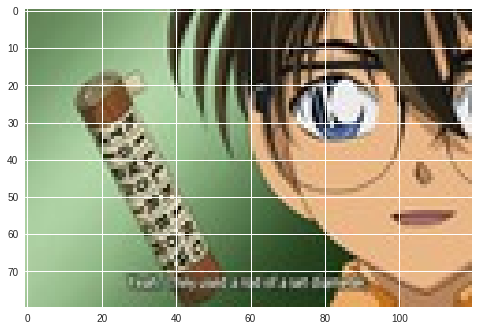

In [15]:
imgplot = plt.imshow(X[0])

In [0]:
#optional
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    print(img.shape)
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (20,20)) 
ax = fig.add_subplot(111)
visualize_input(small_img, ax)

In [0]:
#optional
import cv2
import scipy.misc

gray_img = cv2.cvtColor(X_train[0], cv2.COLOR_BGR2GRAY)
print(gray_img.shape)

# resize to smaller
small_img = scipy.misc.imresize(gray_img, 0.3)

#rescale entries to lie in [0,1]
small_img = small_img.astype("float32")/255

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2683, 80, 120, 3)
(895, 80, 120, 3)
(2683,)
(895,)


In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_train[1])

(2683, 80, 120, 3)
(2683,)
[[[0.15686275 0.10196079 0.09019608]
  [0.17254902 0.11764706 0.10588235]
  [0.16862746 0.1254902  0.11764706]
  ...
  [0.23137255 0.12941177 0.13333334]
  [0.2901961  0.1882353  0.19215687]
  [0.2627451  0.16078432 0.16470589]]

 [[0.15686275 0.10196079 0.09019608]
  [0.17254902 0.11764706 0.10588235]
  [0.16862746 0.1254902  0.11764706]
  ...
  [0.23921569 0.13725491 0.14117648]
  [0.30588236 0.20392157 0.20784314]
  [0.28627452 0.18431373 0.1882353 ]]

 [[0.16470589 0.10588235 0.09411765]
  [0.16862746 0.11372549 0.10196079]
  [0.16862746 0.1254902  0.11764706]
  ...
  [0.23921569 0.13725491 0.13333334]
  [0.3019608  0.2        0.20392157]
  [0.28627452 0.18431373 0.1882353 ]]

 ...

 [[0.15686275 0.08627451 0.07058824]
  [0.16862746 0.09803922 0.08235294]
  [0.18431373 0.10588235 0.10980392]
  ...
  [0.20784314 0.10588235 0.10196079]
  [0.21176471 0.11372549 0.09803922]
  [0.21176471 0.11372549 0.09803922]]

 [[0.16078432 0.08627451 0.07058824]
  [0.17254

In [18]:
from keras.utils import np_utils

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)

Using TensorFlow backend.


In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', 
                        input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 80, 120, 16)       448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 60, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 60, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 15, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9600)              0         
__________

In [0]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [25]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 52.0670%


In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2683, 80, 120, 3)
(895, 80, 120, 3)
(2683, 2)
(895, 2)


In [19]:
#optional for augmentation
from keras.utils import np_utils

# break training set into training and validation sets
(X_train, X_valid) = X_train[536:], X_train[:536]  #20% of training set is validation set
(y_train, y_valid) = y_train[536:], y_train[:536]

# print shape of training set
print('x_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_valid.shape[0], 'validation samples')

x_train shape: (2147, 80, 120, 3)
2147 train samples
895 test samples
536 validation samples


In [0]:
#Optional Augmentation
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.2,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.2,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True, # randomly flip images horizontally
        rotation_range=40,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

# create and configure augmented image generator
datagen_valid = ImageDataGenerator(
    width_shift_range=0.2,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.2,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True,# randomly flip images horizontally
        rotation_range=40,
   zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
) 

# fit augmented image generator on data
datagen_train.fit(X_train)
datagen_valid.fit(X_valid)

In [0]:
#Optional Augmentation

import matplotlib.pyplot as plt

# take subset of training data
x_train_subset = X_train[:8]

# visualize subset of training data
fig = plt.figure(figsize=(30,3))
for i in range(0, len(x_train_subset)):
    ax = fig.add_subplot(1, 8, i+1)
    ax.imshow(x_train_subset[i])
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

# visualize augmented images
fig = plt.figure(figsize=(30,3))
for x_batch in datagen_train.flow(x_train_subset, batch_size=12):
    for i in range(0, 8):
        ax = fig.add_subplot(2, 4, i+1)
        ax.imshow(x_batch[i])
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;

In [48]:
#only if augmentation used
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='AvsC.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
model.fit_generator(datagen_train.flow(X_train, y_train, batch_size=100),
                    steps_per_epoch=X_train.shape[0] // 100,
                    epochs=10, verbose=1, callbacks=[checkpointer],
                    validation_data=datagen_valid.flow(X_valid, y_valid, batch_size=32),
                    validation_steps=X_valid.shape[0] // 32)

Epoch 1/10
21/21 [==============================] - 7s 337ms/step - loss: 0.3926 - acc: 0.8205 - val_loss: 0.4184 - val_acc: 0.8184

Epoch 00001: val_loss improved from inf to 0.41836, saving model to AvsC.weights.best.hdf5
Epoch 2/10
21/21 [==============================] - 7s 340ms/step - loss: 0.3809 - acc: 0.8266 - val_loss: 0.4314 - val_acc: 0.7969

Epoch 00002: val_loss did not improve from 0.41836
Epoch 3/10
21/21 [==============================] - 7s 339ms/step - loss: 0.3710 - acc: 0.8309 - val_loss: 0.4202 - val_acc: 0.8027

Epoch 00003: val_loss did not improve from 0.41836
Epoch 4/10
21/21 [==============================] - 7s 337ms/step - loss: 0.3739 - acc: 0.8324 - val_loss: 0.4335 - val_acc: 0.8105

Epoch 00004: val_loss did not improve from 0.41836
Epoch 5/10
21/21 [==============================] - 7s 327ms/step - loss: 0.3673 - acc: 0.8352 - val_loss: 0.4335 - val_acc: 0.8242

Epoch 00005: val_loss did not improve from 0.41836
Epoch 6/10
21/21 [======================

In [0]:
#don't use if used augmentation
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='AvsC.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=200, epochs=10,
          validation_split=0.2, callbacks=[checkpointer], 
          verbose=1, shuffle=True)

In [0]:
# load the weights that yielded the best validation accuracy
model.load_weights('AvsC.weights.best.hdf5')

In [50]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 78.7709%


In [6]:
test = download_files("1v1Tlu5lphgAv9PbPJRo7c7st6fyYnT2B",'Test') #for first time fetching for files

0
title: Lilo-and-Stitch.jpg, id: 1-nErUuhyHH3fyUjwTZe1Cwb4Hma-ynts
1
title: lilo-stitch-lilo-and-stitch-20682836-490-319.jpg, id: 1sOkady166Qg-H-aem_QDgYGcF4VmqYaC
2
title: Recess_Freak2.jpg, id: 1aLVTYNEwrhZwz4lzAGi0eC_fuyAQzxtX
3
title: gallery-1478530969-ashley-spinelli-recess.jpg, id: 16tsz7BZQJ2yeiZ6QW7QFvilss5nILfFj
4
title: אםצ-640x400.jpg, id: 12NCppMmXzHxUXV2B4mCCUukMqf2iZ7PF
5
title: vsd.jpg, id: 19ckf908DUGkWfNT4KKVweHJVD1EskDG2
6
title: Aladdin-and-Abu-Ruby-precious-stones-red-rubies-Disney-Screencaps-Pictures-2560x1440.jpg, id: 1ETzwlCm1BnGl0ZYqNlup2OrRd20gfEpC
7
title: Walt-Disney-Screencaps-Mickey-Mouse-walt-disney-characters-38328405-500-376.png, id: 1zBV_labqJcHLuj5cpvI3c-gS2Dzqazul
8
title: lion-king-screencaps-fresh-adult-simba-simba-the-lion-king-of-lion-king-screencaps.jpg, id: 14ITyNqz38dK0zbJio2DOj9mURAyCit34
9
title: maxresdefault.jpg, id: 1QBeBr8kMGhYto6L_-TG71I211nk7E8t5
10
title: Cute-conan-detective-conan-17552914-500-375.jpg, id: 1CHa_1ke9aezEdFt7aWFCb_FRf

In [0]:
# start from here -------------------------------------
import glob
from PIL import Image
import cv2
import numpy as np



Path1 = "/root/data/Test/"

def Read_Images1(Path):
    images = []
    for filename in os.listdir(Path):
      img = cv2.imread(os.path.join(Path,filename))
      if img is not None:
        #gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        imResize = cv2.resize(img, dsize=(120, 80))
        b,g,r = cv2.split(imResize) 
        rgb_imResize = cv2.merge([r,g,b])     # switch it to r, g, b

        #imResize = img.resize((120,80), Image.ANTIALIAS)
        small_img = rgb_imResize.astype("float32")/255
        images.append(small_img)
    return np.asarray(images)
  
X_new = Read_Images1(Path1)

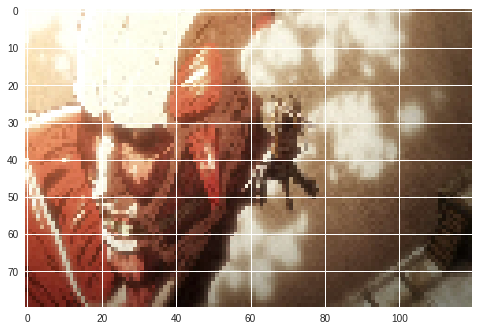

In [8]:
imgplot = plt.imshow(X_new[1])

In [9]:
#Optional Augmentation
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.2,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.2,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True, # randomly flip images horizontally
        rotation_range=40,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)
datagen_train.fit(X_new)

Using TensorFlow backend.


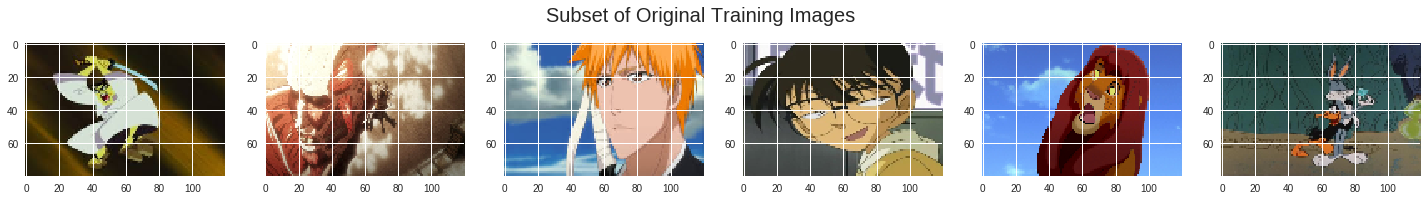

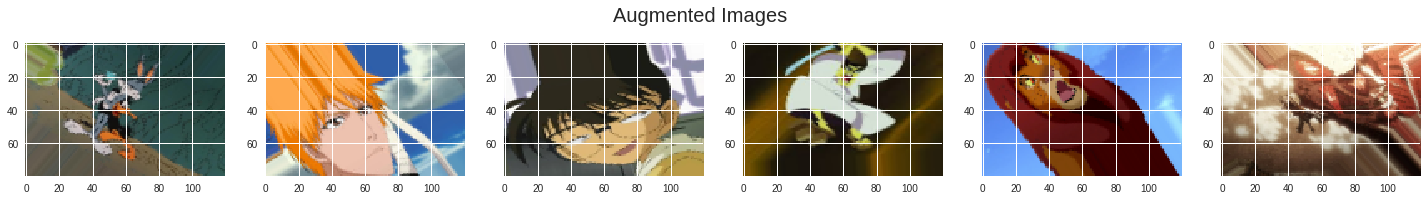

In [12]:
import matplotlib.pyplot as plt

# take subset of training data
x_train_subset = X_new[:6]

# visualize subset of training data
fig = plt.figure(figsize=(25,3))
for i in range(0, len(x_train_subset)):
    ax = fig.add_subplot(1, 6, i+1)
    ax.imshow(x_train_subset[i])
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

# visualize augmented images
fig = plt.figure(figsize=(25,3))
for x_batch in datagen_train.flow(x_train_subset, batch_size=12):
    for i in range(0, 6):
        ax = fig.add_subplot(1, 6, i+1)
        ax.imshow(x_batch[i])
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;

In [0]:
y_real = [1,1,1,1,1
          ,1,1,0,1,1,
          1,0,0,0,0,
          1,0,0,0,1,
          1,1,0,1,1]
y_new = np_utils.to_categorical(y_real, 2)



In [0]:
# get predictions on the test set
y_hat = model.predict(X_new)

# define text labels
AvsC_labels = ['Anime', 'Cartoon']

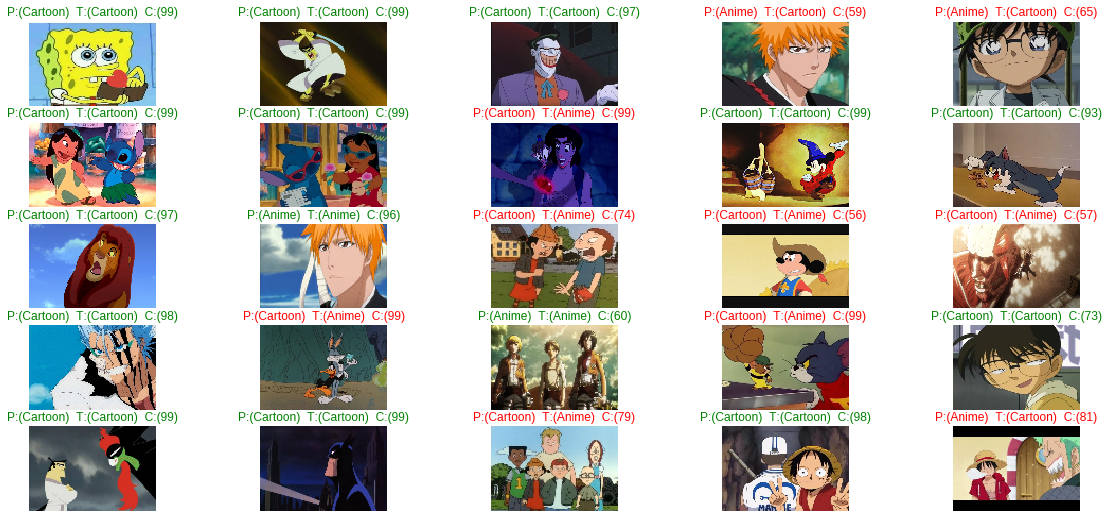

In [41]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 9))
#for i, idx in enumerate(np.random.choice(X_new.shape[0], size=(120,80), replace=False)):
for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    #ax.set_title(str(np.argmax(y_hat[i]))+"("+str(np.argmax(y_new[i]))+")")
    ax.imshow(np.squeeze(X_new[i]))
    pred_idx = np.argmax(y_hat[i])
    true_idx = np.argmax(y_new[i])
    pred_perc = int(np.max(y_hat[i])*100)
    ax.set_title("P:({})  T:({})  C:({})".format(AvsC_labels[pred_idx], AvsC_labels[true_idx],pred_perc),
                 color=("green" if pred_idx == true_idx else "red"))
    

In [40]:
from keras.applications.vgg16 import VGG16
#from keras.utils.vis_utils import plot_model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])
vgg_conv.summary()
#plot_model(model, to_file='vgg.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 80, 120, 3)        0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 80, 120, 64)       1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 80, 120, 64)       36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 40, 60, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 40, 60, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 40, 60, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 20, 30, 128)       0         
__________

In [41]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-8]:
    layer.trainable = False
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer.name, layer.trainable)

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [42]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 3, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 2050      
Total params: 17,863,490
Trainable params: 16,128,002
Non-trainable params: 1,735,488
_________________________________________________________________


In [0]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [44]:
len(model.layers)

5

In [51]:
#only if augmentation used
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='AvsC.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
history = model.fit_generator(datagen_train.flow(X_train, y_train, batch_size=100),
                    steps_per_epoch=X_train.shape[0] // 100,
                    epochs=10, verbose=1, callbacks=[checkpointer],
                    validation_data=datagen_valid.flow(X_valid, y_valid, batch_size=32),
                    validation_steps=X_valid.shape[0] // 32)

Epoch 1/10
21/21 [==============================] - 10s 452ms/step - loss: 0.2883 - acc: 0.8849 - val_loss: 0.3988 - val_acc: 0.8203

Epoch 00001: val_loss improved from inf to 0.39878, saving model to AvsC.weights.best.hdf5
Epoch 2/10
21/21 [==============================] - 10s 470ms/step - loss: 0.2820 - acc: 0.8848 - val_loss: 0.3686 - val_acc: 0.8281

Epoch 00002: val_loss improved from 0.39878 to 0.36864, saving model to AvsC.weights.best.hdf5
Epoch 3/10
21/21 [==============================] - 10s 463ms/step - loss: 0.2745 - acc: 0.8903 - val_loss: 0.5005 - val_acc: 0.8086

Epoch 00003: val_loss did not improve from 0.36864
Epoch 4/10
21/21 [==============================] - 10s 472ms/step - loss: 0.2268 - acc: 0.9060 - val_loss: 0.3831 - val_acc: 0.8398

Epoch 00004: val_loss did not improve from 0.36864
Epoch 5/10
21/21 [==============================] - 10s 486ms/step - loss: 0.1920 - acc: 0.9243 - val_loss: 0.6174 - val_acc: 0.7930

Epoch 00005: val_loss did not improve from

In [0]:
# load the weights that yielded the best validation accuracy
model.load_weights('AvsC.weights.best.hdf5')

In [53]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 87.8212%


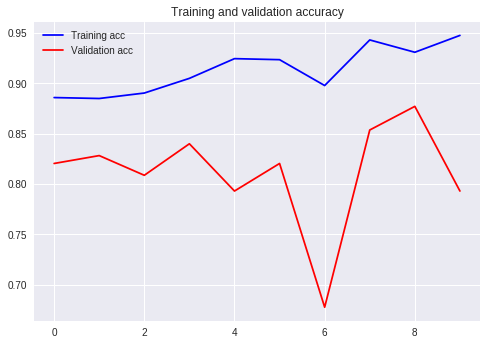

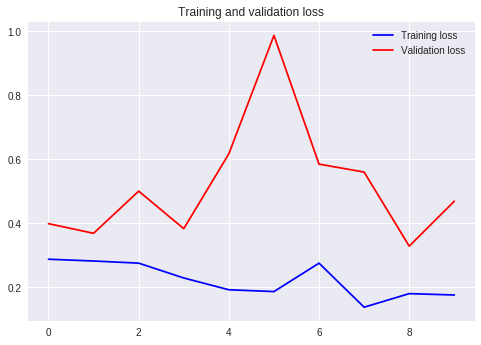

In [66]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [94]:
from keras.applications.vgg19 import VGG19
#from keras.utils.vis_utils import plot_model
vgg_conv = VGG19(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])
vgg_conv.summary()
#plot_model(model, to_file='vgg.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 80, 120, 3)        0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 80, 120, 64)       1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 80, 120, 64)       36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 40, 60, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 40, 60, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 40, 60, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 20, 30, 128)       0         
__________

In [95]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-10]:
    layer.trainable = False
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer.name, layer.trainable)

input_5 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_conv4 False
block3_pool False
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_conv4 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_conv4 True
block5_pool True


In [96]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 2, 3, 512)         20024384  
_________________________________________________________________
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 2050      
Total params: 23,173,186
Trainable params: 20,847,618
Non-trainable params: 2,325,568
_________________________________________________________________


In [0]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [104]:
#only if augmentation used
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='AvsC.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
history = model.fit_generator(datagen_train.flow(X_train, y_train, batch_size=100),
                    steps_per_epoch=X_train.shape[0] // 100,
                    epochs=10, verbose=1, callbacks=[checkpointer],
                    validation_data=datagen_valid.flow(X_valid, y_valid, batch_size=32),
                    validation_steps=X_valid.shape[0] // 32)

Epoch 1/10
21/21 [==============================] - 11s 526ms/step - loss: 0.3978 - acc: 0.8339 - val_loss: 0.3978 - val_acc: 0.8281

Epoch 00001: val_loss improved from inf to 0.39784, saving model to AvsC.weights.best.hdf5
Epoch 2/10
21/21 [==============================] - 11s 511ms/step - loss: 0.3908 - acc: 0.8347 - val_loss: 0.3634 - val_acc: 0.8320

Epoch 00002: val_loss improved from 0.39784 to 0.36341, saving model to AvsC.weights.best.hdf5
Epoch 3/10
21/21 [==============================] - 11s 510ms/step - loss: 0.4210 - acc: 0.8254 - val_loss: 0.4800 - val_acc: 0.7812

Epoch 00003: val_loss did not improve from 0.36341
Epoch 4/10
21/21 [==============================] - 11s 515ms/step - loss: 0.3501 - acc: 0.8443 - val_loss: 0.3833 - val_acc: 0.8008

Epoch 00004: val_loss did not improve from 0.36341
Epoch 5/10
21/21 [==============================] - 11s 521ms/step - loss: 0.3573 - acc: 0.8429 - val_loss: 0.4620 - val_acc: 0.7754

Epoch 00005: val_loss did not improve from

In [0]:
# load the weights that yielded the best validation accuracy
model.load_weights('AvsC.weights.best.hdf5')

In [106]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 86.4804%


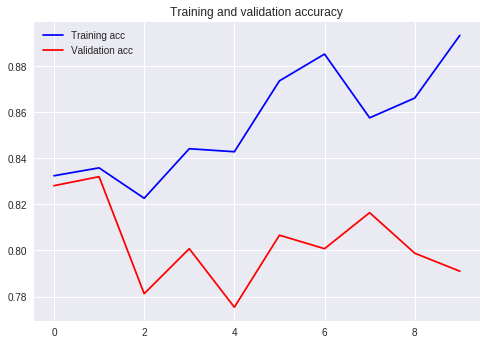

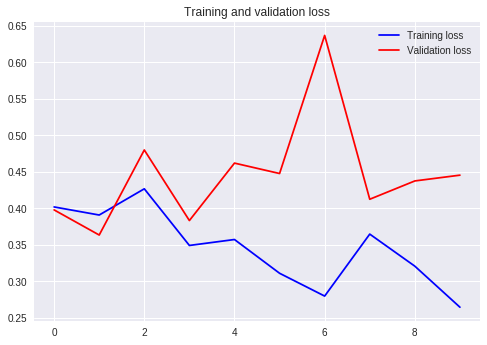

In [107]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [140]:
from keras.applications.xception import Xception
#from keras.utils.vis_utils import plot_model
xcep_con = Xception(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])
xcep_con.summary()
#plot_model(model, to_file='vgg.png')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 80, 120, 3)   0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 39, 59, 32)   864         input_11[0][0]                   
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 39, 59, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 39, 59, 32)   0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [141]:
# Freeze the layers except the last 4 layers
for layer in xcep_con.layers[:-96]:
#[:-10]:
    layer.trainable = False
# Check the trainable status of the individual layers
for layer in xcep_con.layers:
    print(layer.name, layer.trainable)

input_11 False
block1_conv1 False
block1_conv1_bn False
block1_conv1_act False
block1_conv2 False
block1_conv2_bn False
block1_conv2_act False
block2_sepconv1 False
block2_sepconv1_bn False
block2_sepconv2_act False
block2_sepconv2 False
block2_sepconv2_bn False
conv2d_44 False
block2_pool False
batch_normalization_41 False
add_121 False
block3_sepconv1_act False
block3_sepconv1 False
block3_sepconv1_bn False
block3_sepconv2_act False
block3_sepconv2 False
block3_sepconv2_bn False
conv2d_45 False
block3_pool False
batch_normalization_42 False
add_122 False
block4_sepconv1_act False
block4_sepconv1 False
block4_sepconv1_bn False
block4_sepconv2_act False
block4_sepconv2 False
block4_sepconv2_bn False
conv2d_46 False
block4_pool False
batch_normalization_43 False
add_123 False
block5_sepconv1_act True
block5_sepconv1 True
block5_sepconv1_bn True
block5_sepconv2_act True
block5_sepconv2 True
block5_sepconv2_bn True
block5_sepconv3_act True
block5_sepconv3 True
block5_sepconv3_bn True
add_

In [142]:
len(xcep_con.layers)

132

In [143]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(xcep_con)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 3, 4, 2048)        20861480  
_________________________________________________________________
flatten_10 (Flatten)         (None, 24576)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 1024)              25166848  
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 2050      
Total params: 46,030,378
Trainable params: 44,869,090
Non-trainable params: 1,161,288
_________________________________________________________________


In [0]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              #optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['acc'])

In [147]:
#only if augmentation used
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='AvsC.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
history = model.fit_generator(datagen_train.flow(X_train, y_train, batch_size=100),
                    steps_per_epoch=X_train.shape[0] // 100,
                    epochs=40, verbose=1, callbacks=[checkpointer],
                    validation_data=datagen_valid.flow(X_valid, y_valid, batch_size=32),
                    validation_steps=X_valid.shape[0] // 32)

Epoch 1/40
21/21 [==============================] - 13s 638ms/step - loss: 0.6470 - acc: 0.6438 - val_loss: 0.6490 - val_acc: 0.6660

Epoch 00001: val_loss improved from inf to 0.64898, saving model to AvsC.weights.best.hdf5
Epoch 2/40
21/21 [==============================] - 13s 625ms/step - loss: 0.6441 - acc: 0.6409 - val_loss: 0.6610 - val_acc: 0.6211

Epoch 00002: val_loss did not improve from 0.64898
Epoch 3/40
21/21 [==============================] - 13s 634ms/step - loss: 0.6505 - acc: 0.6281 - val_loss: 0.6675 - val_acc: 0.6172

Epoch 00003: val_loss did not improve from 0.64898
Epoch 4/40
21/21 [==============================] - 13s 611ms/step - loss: 0.6377 - acc: 0.6272 - val_loss: 0.6576 - val_acc: 0.6562

Epoch 00004: val_loss did not improve from 0.64898
Epoch 5/40
21/21 [==============================] - 13s 625ms/step - loss: 0.6346 - acc: 0.6524 - val_loss: 0.6512 - val_acc: 0.6465

Epoch 00005: val_loss did not improve from 0.64898
Epoch 6/40
21/21 [=================

In [0]:
# load the weights that yielded the best validation accuracy
model.load_weights('AvsC.weights.best.hdf5')

In [149]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 68.6034%


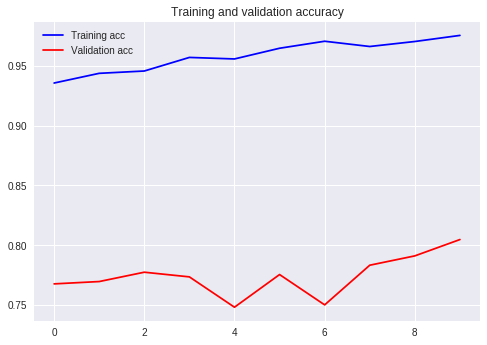

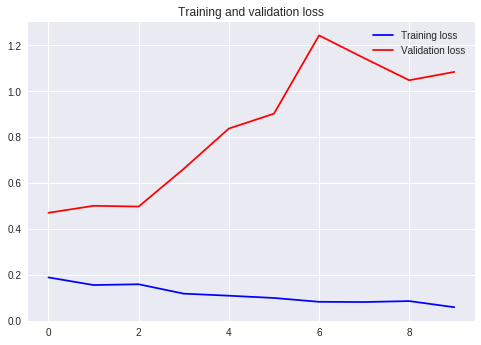

In [136]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()